In [1]:
# general libraries
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv("Group1.csv")

In [4]:
for col in df.columns:
    print(col)

ssn
cc_num
first
last
gender
street
city
state
zip
lat
long
city_pop
job
dob
acct_num
trans_num
trans_date
trans_time
unix_time
category
amt
is_fraud
merchant
merch_lat
merch_long


In [6]:
df.city.value_counts()

San Fernando          6371
Calapan               4959
Masbate               4950
Cadiz                 4940
Dasmarinas            4250
Malaybalay            3541
Pagadian              3540
Olongapo              3524
Dumaguete City        2823
City of Isabela       2136
Muntinlupa City       2132
Mati                  2131
Malabon               2129
Butuan                2129
Tagbilaran City       2128
Sorsogon              2126
City of Calamba       2121
Angeles City          2121
Meycauayan            2120
Santa Rosa            2118
Naga City             2118
Binan                 2117
Batangas              2117
Digos                 2115
Laoag                 2113
Makati City           2113
Tacloban              2110
General Santos        1421
Maasin                1421
Palayan City          1419
Navotas               1418
Puerto Princesa       1418
Vigan                 1417
Balanga               1417
Cabanatuan City       1415
Valenzuela            1412
City of Paranaque     1411
C

In [7]:
df.is_fraud.value_counts()

0    99129
1      871
Name: is_fraud, dtype: int64

In [8]:
df_fraud = df[df["is_fraud"] == 1]

df_fraud.city.value_counts()

San Fernando          46
Dasmarinas            42
Calapan               40
Tuguegarao            33
Pagadian              32
Masbate               25
Cadiz                 25
City of Isabela       24
Malaybalay            22
Marikina City         22
Mati                  21
Sorsogon              20
Muntinlupa City       20
Santiago              19
Butuan                19
Lipa City             19
San Juan              18
Malabon               18
Olongapo              18
Tagbilaran City       17
Antipolo              16
General Santos        14
Navotas               12
Bacolod               12
Imus                  12
Naga City             12
Angeles City          12
Talisay               11
Palayan City          11
Santa Rosa            11
Maasin                11
City of Calamba       11
Batangas              10
Balanga               10
Binan                 10
Lucena                10
Iligan                10
Laoag                 10
Puerto Princesa       10
Cabanatuan City       10


In [9]:
df.job.value_counts()

Psychotherapist                       4242
Tourist information centre manager    4241
Financial controller                  2123
Brewing technologist                  2122
Scientific laboratory technician      2121
                                      ... 
Biomedical scientist                     8
Designer, exhibition/display             8
Quantity surveyor                        7
Youth worker                             7
Librarian, public                        7
Name: job, Length: 90, dtype: int64

In [10]:
df["trans_date"] = pd.to_datetime(df["trans_date"])
df = df.set_index("trans_date")

Text(0.5, 1.0, 'monthly fraud')

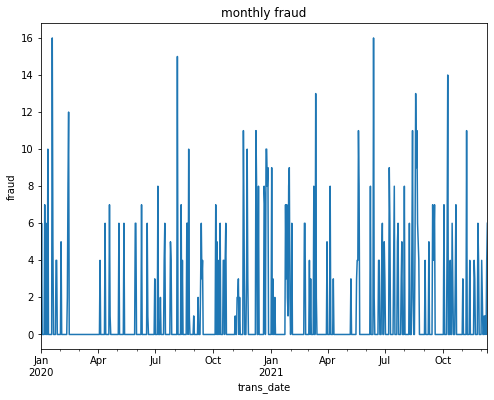

In [14]:
import statsmodels.api as sm

mon_df = df['is_fraud'].resample('D').sum()

#line chart of monthly streams
fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
mon_df.plot(ax=ax, kind='line')

#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

plt.ylabel('fraud')
plt.title('monthly fraud')

trans_date
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04         NaN
2020-01-05         NaN
                ...   
2021-12-07    1.000000
2021-12-08    1.142857
2021-12-09    0.571429
2021-12-10    0.857143
2021-12-11    1.714286
Freq: D, Name: is_fraud, Length: 711, dtype: float64


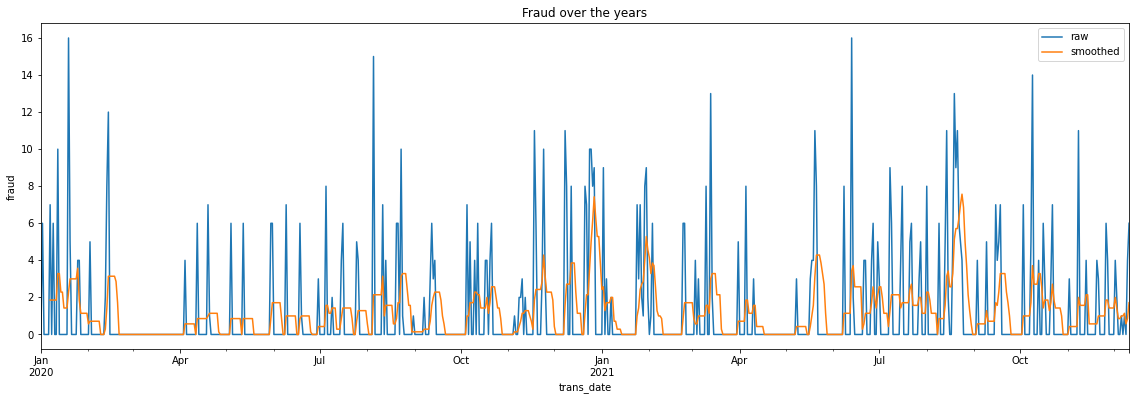

In [16]:
daily_df = df['is_fraud'].resample('D').sum()

print(daily_df.rolling(7).mean())

fig = plt.figure(figsize=(19.5,6))
ax = fig.add_subplot(111)

daily_df = df['is_fraud'].resample('D').sum()

daily_df_rolling = daily_df.rolling(7).mean()

daily_df.plot(ax=ax, label='raw')
daily_df_rolling.plot(ax=ax, label='smoothed')

plt.legend()
plt.ylabel('fraud')
plt.title('Fraud over the years')

res = sm.tsa.seasonal_decompose(daily_df)

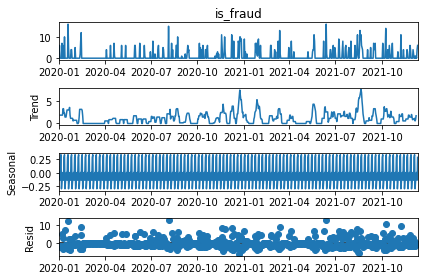

In [17]:
resplot = res.plot()